In [1]:
import root_pandas as rp
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ROOT
import array
import matplotlib
from matplotlib import rc #for custom label formatting
'''Make larger axes labels for plots for papers and such'''
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams["figure.titlesize"] = 30
plt.rc('legend', fontsize=18)
plt.rc('xtick', labelsize=24)
plt.rc('ytick', labelsize=24)
plt.rc('axes', labelsize=26)
plt.rc('axes', titlesize=26)

Welcome to JupyROOT 6.22/02


In [2]:
#B = rp.read_root('/home/jeff/data/thesis_data/combined_reco_ntuples/merged_events.root', key='B')

e = rp.read_root('~/evtgen_exp_55_BDstlnu_signal-4.root',key='e')
mu = rp.read_root('~/evtgen_exp_55_BDstlnu_signal-4.root',key='mu')
truth_e = rp.read_root('~/evtgen_exp_55_BDstlnu_signal-4.root',key='e_truth')
truth_mu = rp.read_root('~/evtgen_exp_55_BDstlnu_signal-4.root',key='mu_truth')
truth_B = rp.read_root('~/evtgen_exp_55_BDstlnu_signal-4.root',key='B_truth')

# Test Lepton ID

In [3]:
e_red = e.loc[(e['muIDBelleQuality']<0.9) & (e['eIDBelle']>0.25)]
mu_red = mu.loc[(mu['muIDBelleQuality']>0.9) & (mu['muIDBelle']>0.4) & (mu['eIDBelle']<0.2)]

In [4]:
esig_orig = e.loc[e['isSignal']==1]
ebg_orig = e.loc[e['isSignal']!=1]
esig_red = e_red.loc[e_red['isSignal']==1]
ebg_red = e_red.loc[e_red['isSignal']!=1]

In [5]:
musig_orig = mu.loc[mu['isSignal']==1]
mubg_orig = mu.loc[mu['isSignal']!=1]
musig_red = mu_red.loc[mu_red['isSignal']==1]
mubg_red = mu_red.loc[mu_red['isSignal']!=1]

/home/jeff/anaconda3/envs/root_env/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/jeff/anaconda3/envs/root_env/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


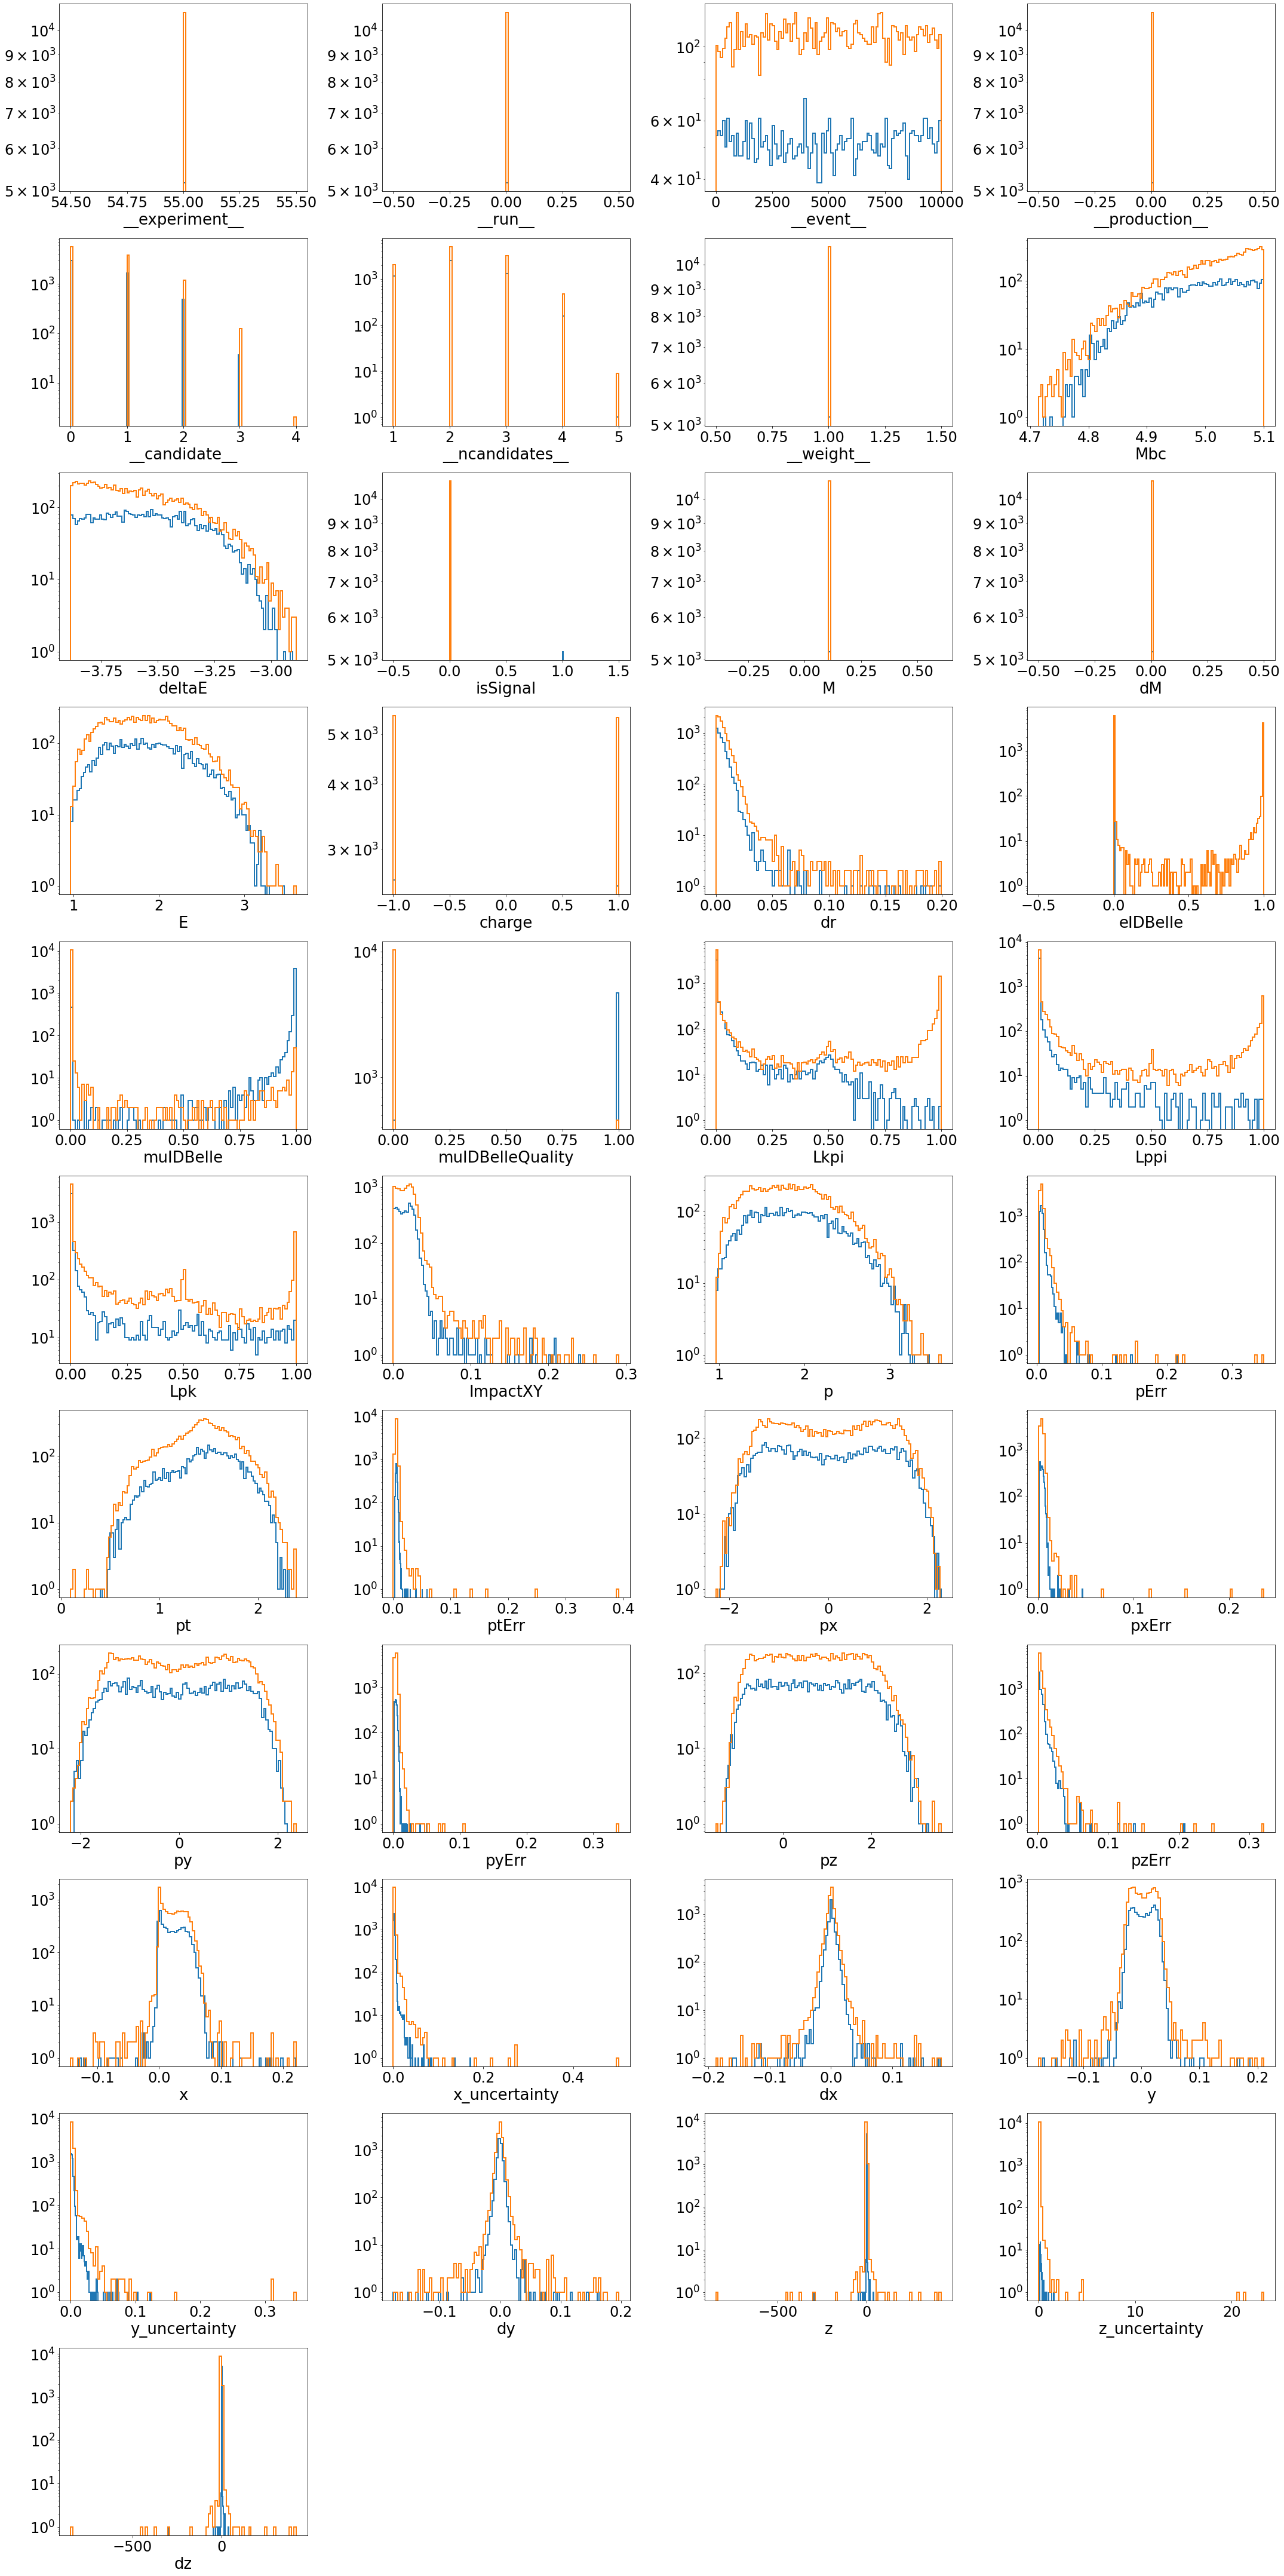

In [6]:
fig = plt.figure(figsize = (30,60))
for i, col in enumerate(mu.columns):
    plt.subplot(11,4,i+1)
    plt.hist(musig_orig[col], histtype='step', lw=2,label = 'signal', bins = 100)
    plt.hist(mubg_orig[col], histtype='step', lw=2,label = 'bg', bins = 100)
    plt.xlabel(col)
    plt.yscale("Log")
plt.tight_layout()
plt.show()

In [32]:
#lepton = esig_red.append(musig_red).sort_values(by='__event__')
lepton = e_red.append(mu_red).sort_values(by='__event__')

In [33]:
lepton['ones'] = 1

In [34]:
tab = pd.pivot_table(lepton, values='ones', index=['__event__'], aggfunc=np.sum)

In [35]:
tab.loc[tab['ones'] == 2].index.to_numpy()

array([   3,    8,   12, ..., 9986, 9989, 9995])

In [36]:
pairs = lepton.loc[lepton['__event__'].isin(tab.loc[tab['ones']==2].index.to_numpy())]

In [37]:
pairs.index = [i for i in range(0,len(pairs))]

In [38]:
pairs['truth_dz'] = truth_B.loc[truth_B['__event__'].isin(pairs['__event__'].to_numpy())]['mcDecayVertexFromIPZ'].to_numpy()

/home/jeff/anaconda3/envs/root_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
pairs

__experiment__  __run__  __event__  __production__  __candidate__  \
0                 55        0          3               0              1   
1                 55        0          3               0              0   
2                 55        0          8               0              0   
3                 55        0          8               0              1   
4                 55        0         12               0              0   
...              ...      ...        ...             ...            ...   
4529              55        0       9986               0              1   
4530              55        0       9989               0              0   
4531              55        0       9989               0              1   
4532              55        0       9995               0              1   
4533              55        0       9995               0              0   

      __ncandidates__  __weight__       Mbc    deltaE  isSignal  ...  \
0                   2         1.0  5.027506 -3.646678       1.0  ...   
1                   2         1.0  4.891362 -3.274347       1.0  ...   
2                   2         1.0  5.045656 -3.703318       1.0  ...   
3                   2         1.0  4.972956 -3.485134       1.0  ...   
4                   2         1.0  4.965894 -3.468846       1.0  ...   
...               ...         ...       ...       ...       ...  ...   
4529                2         1.0  5.015637 -3.610778       1.0  ...   
4530                2         1.0  5.023067 -3.629782       1.0  ...   
4531                2         1.0  5.004867 -3.578925       1.0  ...   
4532                3         1.0  4.942097 -3.402226       1.0  ...   
4533                3         1.0  5.053215 -3.727576       1.0  ...   

      x_uncertainty        dx         y  y_uncertainty        dy         z  \
0          0.001786 -0.009165 -0.012275       0.001628  0.008236  0.235059   
1          0.007019 -0.018255  0.008057       0.002093 -0.005301  0.194517   
2          0.004266 -0.002820  0.023938       0.005497 -0.003692  0.111201   
3          0.002827 -0.006828  0.015236       0.001124 -0.002857  0.087832   
4          0.001817 -0.000048  0.020671       0.000955 -0.000024  0.212819   
...             ...       ...       ...            ...       ...       ...   
4529       0.000022  0.000002  0.006362       0.004044 -0.000766  0.169610   
4530       0.002072  0.005596 -0.025811       0.002633 -0.007255 -0.323774   
4531       0.001185  0.001463  0.026487       0.002993  0.003602 -0.307724   
4532       0.001885 -0.000961 -0.013144       0.003333  0.001714  0.195757   
4533       0.002035  0.005197 -0.025373       0.001897 -0.004981  0.228101   

      z_uncertainty        dz  ones  truth_dz  
0          0.004016  0.210859     1  0.198920  
1          0.012666  0.206488     1  0.221824  
2          0.005174  0.099574     1  0.106025  
3          0.006798  0.111045     1  0.105734  
4          0.002421  0.212522     1  0.210256  
...             ...       ...   ...       ...  
4529       0.005815  0.218414     1  0.235156  
4530       0.002667 -0.306893     1 -0.304150  
4531       0.002697 -0.312157     1 -0.313188  
4532       0.004851  0.241456     1  0.272145  
4533       0.004456  0.267456     1  0.256691  

[4534 rows x 43 columns]

In [40]:
tmp = pairs.groupby('__event__').diff()

In [41]:
tmp.dropna(subset = ['z'], inplace = True)
tmp.index = [i for i in range(0,len(tmp))]
tmp['deltaT'] = tmp['dz']/(0.425*3e10)*1e12
tmp['mcDeltaT'] = tmp['truth_dz']/(0.425*3e10)*1e12

In [42]:
tmp

__experiment__  __run__  __production__  __candidate__  __ncandidates__  \
0                0.0      0.0             0.0           -1.0              0.0   
1                0.0      0.0             0.0            1.0              0.0   
2                0.0      0.0             0.0            1.0              0.0   
3                0.0      0.0             0.0           -1.0              0.0   
4                0.0      0.0             0.0           -1.0              0.0   
...              ...      ...             ...            ...              ...   
2262             0.0      0.0             0.0            1.0              0.0   
2263             0.0      0.0             0.0            1.0              0.0   
2264             0.0      0.0             0.0            1.0              0.0   
2265             0.0      0.0             0.0            1.0              0.0   
2266             0.0      0.0             0.0           -1.0              0.0   

      __weight__       Mbc    deltaE  isSignal         M  ...         y  \
0            0.0 -0.136144  0.372331       0.0  0.105147  ...  0.020333   
1            0.0 -0.072700  0.218184       0.0  0.105147  ... -0.008701   
2            0.0  0.107146 -0.324398       0.0  0.000000  ... -0.040753   
3            0.0 -0.116318  0.285959       0.0  0.105147  ...  0.002494   
4            0.0  0.101168 -0.295871       0.0  0.000000  ... -0.016035   
...          ...       ...       ...       ...       ...  ...       ...   
2262         0.0  0.004850 -0.014928       0.0  0.000000  ...  0.033327   
2263         0.0  0.031137 -0.099391       0.0 -0.105147  ... -0.003761   
2264         0.0 -0.078166  0.254782       0.0  0.000000  ... -0.003008   
2265         0.0 -0.018200  0.050857       0.0 -0.105147  ...  0.052299   
2266         0.0  0.111118 -0.325349       0.0 -0.105147  ... -0.012229   

      y_uncertainty        dy         z  z_uncertainty        dz  ones  \
0          0.000465 -0.013537 -0.040541       0.008650 -0.004371   0.0   
1         -0.004373  0.000835 -0.023369       0.001624  0.011472   0.0   
2          0.000379 -0.000849 -0.027405       0.001002 -0.020508   0.0   
3         -0.000109  0.000164  0.002547       0.000737  0.012858   0.0   
4         -0.000517 -0.001265  0.025042      -0.003163  0.012837   0.0   
...             ...       ...       ...            ...       ...   ...   
2262      -0.000945  0.000435 -0.076262      -0.001048 -0.047163   0.0   
2263      -0.002700 -0.002762  0.033043      -0.008482 -0.019453   0.0   
2264       0.003460 -0.001838 -0.060121       0.000383 -0.017414   0.0   
2265       0.000360  0.010857  0.016050       0.000031 -0.005264   0.0   
2266      -0.001436 -0.006695  0.032344      -0.000395  0.026000   0.0   

      truth_dz    deltaT  mcDeltaT  
0     0.022905 -0.342809  1.796444  
1    -0.000291  0.899742 -0.022848  
2    -0.017336 -1.608450 -1.359656  
3    -0.008093  1.008477 -0.634747  
4    -0.004170  1.006841 -0.327078  
...        ...       ...       ...  
2262 -0.031426 -3.699059 -2.464792  
2263 -0.013463 -1.525700 -1.055902  
2264 -0.001271 -1.365830 -0.099675  
2265 -0.009038 -0.412891 -0.708886  
2266 -0.015454  2.039242 -1.212092  

[2267 rows x 44 columns]

In [43]:
tmp['deltaT'] = np.abs(tmp['deltaT'])
tmp['mcDeltaT'] = np.abs(tmp['mcDeltaT'])

In [44]:
tmp['charge']

0       2.0
1      -2.0
2      -2.0
3       2.0
4       2.0
       ... 
2262    0.0
2263   -2.0
2264   -2.0
2265   -2.0
2266    2.0
Name: charge, Length: 2267, dtype: float64

In [45]:
tmp['SF']=0
tmp['OF']=0
index1 = tmp.loc[tmp['charge']==0].index.to_numpy()
index2 = tmp.loc[tmp['charge']!=0].index.to_numpy()
tmp['SF'][index1]=1
tmp['OF'][index2]=1

/home/jeff/anaconda3/envs/root_env/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/jeff/anaconda3/envs/root_env/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/jeff/anaconda3/envs/root_env/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

In [46]:
tmp['counts'] = 1 #to count number of entries per bin after grouping

In [47]:
test = tmp.groupby(pd.cut(tmp['deltaT'],bins = [0,0.5] + [i for i in range(1,7)] + [7,9,13,20])).sum()
test_err = np.sqrt(tmp.groupby(pd.cut(tmp['deltaT'],bins = [0,0.5] + [i for i in range(1,7)] + [7,9,13,20])).sum())
test_truth = tmp.groupby(pd.cut(tmp['mcDeltaT'],bins = [0,0.5] + [i for i in range(1,7)] + [7,9,13,20])).sum()
test_truth_err = np.sqrt(tmp.groupby(pd.cut(tmp['mcDeltaT'],bins = [0,0.5] + [i for i in range(1,7)] + [7,9,13,20])).sum())

/home/jeff/anaconda3/envs/root_env/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  
/home/jeff/anaconda3/envs/root_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.


In [48]:
A = (test['OF']-test['SF'])/(test['OF']+test['SF'])
A_err = np.abs(A)*np.sqrt((np.sqrt(test_err['OF']**2+test_err['SF']**2)/(test['OF']-test['SF']))**2 + (np.sqrt(test_err['OF']**2+test_err['SF']**2)/(test['OF']+test['SF']))**2)


In [49]:
A_truth = (test_truth['OF']-test_truth['SF'])/(test_truth['OF']+test_truth['SF'])
A_truth_err = np.abs(A_truth)*np.sqrt((np.sqrt(test_truth_err['OF']**2+test_truth_err['SF']**2)/(test_truth['OF']-test_truth['SF']))**2 + (np.sqrt(test_truth_err['OF']**2+test_truth_err['SF']**2)/(test_truth['OF']+test_truth['SF']))**2)

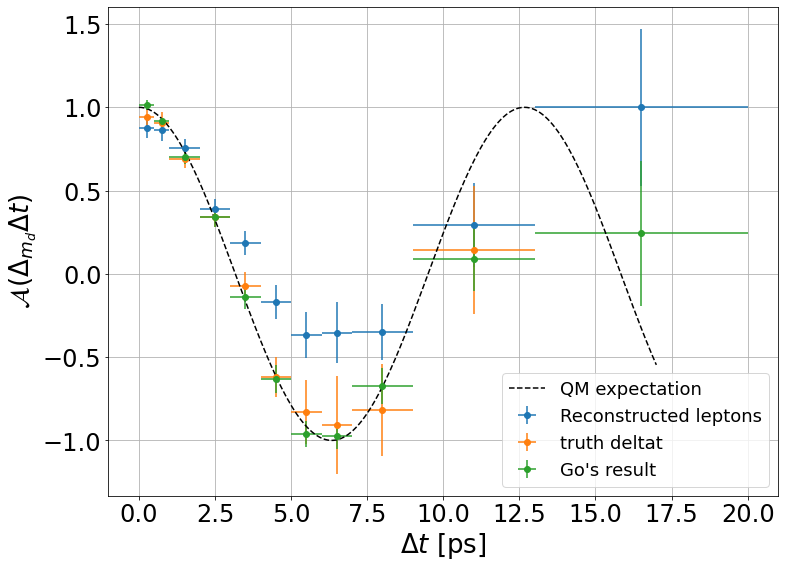

In [50]:
plt.figure(figsize = (12,9))
centers = [0.25,0.75,1.5,2.5,3.5,4.5,5.5,6.5,8,11,16.5]
widths = [0.25, 0.25, 0.5, 0.5 ,0.5, 0.5, 0.5, 0.5, 1, 2, 3.5]
plt.errorbar(centers,A,A_err,widths, 'o', label = "Reconstructed leptons")
plt.errorbar(centers,A_truth,A_truth_err,widths, 'o', label = "truth deltat")

go = np.array([1.013, 0.916, 0.699, 0.339, -0.136, -0.634, -0.961, -0.974, -0.675, 0.089, 0.243])
go_err = np.array([0.028, 0.022, 0.038, 0.056, 0.075, 0.084, 0.077, 0.080, 0.109, 0.193, 0.435])
plt.errorbar(centers,go,go_err,widths, 'o', label = "Go's result")

x = np.linspace(0,17,201)
plt.plot(x, np.cos(0.496*x), 'k', linestyle = '--', label='QM expectation')
#plt.plot(x, np.cos(0.4496*x), 'red', linestyle = '--', label='SD least squares fit to truth MC')

plt.ylabel(r'$\mathcal{A}(\Delta_{m_d}\Delta t)$')
plt.xlabel(r'$\Delta t$ [ps]')
plt.grid()
plt.legend()
#plt.savefig('truth_mc_result.png', bbox_inches = 'tight', dpi = 300)

In [ ]:
def root_fit(plot_data, A, A_err): #fits cosine curve to data (asymmetry computed from binning)
    x1 = array.array('d', [0.25,0.75,1.5,2.5,3.5,4.5,5.5,6.5,8,11,16.5])
    y = array.array('d', A)
    xerr = array.array('d', [0 for i in range(0,len(x1))])
    #xerr = array.array('d', [0.25, 0.25, 0.5, 0.5 ,0.5, 0.5, 0.5, 0.5, 1, 2, 3.5])
    yerr = array.array('d', A_err)
    gr = ROOT.TGraphErrors(len(x1), x1, y, xerr, yerr)
    f = ROOT.TF1('f1', 'cos([0]*x)', 0, 16.5)
    gr.Fit('f1', 'SMRB')
    fitdict = {"QM":f.GetParameter(0), "QM_err":f.GetParError(0)}
    return fitdict

In [ ]:
root_fit(tmp,A,A_err)

In [ ]:
bg

In [ ]:
bg.loc[(bg['dr']<0.2) & (bg['CMS_p']>1.4) & (bg['CMS_p']<2.4)]